### ANN on corrupted MNIST dataset

#### Import relevant packages

In [17]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

#### Load the dataset `mnist_corrupted/zigzag` from `tensorflow_datasets`. 

In [2]:
import tensorflow_datasets as tfds

## write your code here
dataset_name = "mnist_corrupted/zigzag"
train_images, train_labels = tfds.as_numpy(tfds.load(
    dataset_name,
    split='train',
    batch_size=-1,
    as_supervised=True,
))
test_images, test_labels   = tfds.as_numpy(tfds.load(
    dataset_name,
    split='test',
    batch_size=-1,
    as_supervised=True,
))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist_corrupted/zigzag/1.0.0.incompleteA5V6ZJ/mnist_corrupted-train.tfreco…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist_corrupted/zigzag/1.0.0.incompleteA5V6ZJ/mnist_corrupted-test.tfrecor…

Dataset mnist_corrupted downloaded and prepared to /root/tensorflow_datasets/mnist_corrupted/zigzag/1.0.0. Subsequent calls will reuse this data.


In [3]:
# Test size of different loaded numpy arrays
print('Image size:', train_images[0].shape)
print('Training data size:',train_images.shape)
print('Testing data size:', test_images.shape)

Image size: (28, 28, 1)
Training data size: (60000, 28, 28, 1)
Testing data size: (10000, 28, 28, 1)


In [5]:
# Normalize input between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

#### GridSearchCV to find best hyperparameters 

In [22]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [23]:
# Tensorflow model
def create_model(units=20):
    model = tf.keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    model.add(layers.Dense(units, activation='relu'))   
    model.add(layers.Dense(units, activation='relu'))
    model.add(layers.Dense(units, activation='relu'))     
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [27]:
# Hyperparameters 
hyperparameters = {
    'units': [30,40],
    'epochs': [10, 12],
    'batch_size': [40,80],
}

In [25]:
# Keras classifier to wrap Tensorflow model
keras_classifier = KerasClassifier(create_model)

<ipython-input-25-a15e18b07d3d>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = KerasClassifier(create_model)


In [28]:
# GridSearchCV to find best hyperparameters
grid_search = GridSearchCV(
    estimator=keras_classifier,
    param_grid=hyperparameters,
    scoring='accuracy',
    cv=3,
)

# Fit the GridSearchCV object
grid_result = grid_search.fit(train_images, train_labels)

# Get the best hyperparameters
print(f"Best accuracy: {grid_result.best_score_} using {grid_result.best_params_}")

Epoch 1/10
1000/1000 [==============================] - 4s 3ms/step - loss: 0.5334 - accuracy: 0.8386
Epoch 2/10
1000/1000 [==============================] - 4s 3ms/step - loss: 0.2827 - accuracy: 0.9151
Epoch 3/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.2260 - accuracy: 0.9312
Epoch 4/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1893 - accuracy: 0.9422
Epoch 5/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1626 - accuracy: 0.9492
Epoch 6/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1465 - accuracy: 0.9547
Epoch 7/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1330 - accuracy: 0.9586
Epoch 8/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1191 - accuracy: 0.9617
Epoch 9/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1110 - accuracy: 0.9644
Epoch 10/10
625/625 [==============================] - 1s 2ms/step
Epoch 1/10
1000

### Building dense ANN using hyperparameters from above

In [32]:
model = tf.keras.Sequential()
outputs = 10
## write your code here to build your dense ANN. Input layer is created below
model.add(layers.Flatten(input_shape=(train_images[0].shape)))        
model.add(layers.Dense(40, activation='relu'))   
model.add(layers.Dense(40, activation='relu'))
model.add(layers.Dense(40, activation='relu'))     
model.add(layers.Dense(10, activation='softmax'))

In [33]:
### write your code her to compile model
model.compile(optimizer='Adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
### write your code here to train your model
history = model.fit(train_images, train_labels, epochs=12,batch_size=80)

Epoch 1/12
750/750 [==============================] - 6s 5ms/step - loss: 0.4954 - accuracy: 0.8462
Epoch 2/12
750/750 [==============================] - 3s 4ms/step - loss: 0.2284 - accuracy: 0.9319
Epoch 3/12
750/750 [==============================] - 3s 4ms/step - loss: 0.1805 - accuracy: 0.9454
Epoch 4/12
750/750 [==============================] - 3s 4ms/step - loss: 0.1521 - accuracy: 0.9538
Epoch 5/12
750/750 [==============================] - 3s 4ms/step - loss: 0.1329 - accuracy: 0.9596
Epoch 6/12
750/750 [==============================] - 3s 4ms/step - loss: 0.1185 - accuracy: 0.9632
Epoch 7/12
750/750 [==============================] - 3s 4ms/step - loss: 0.1075 - accuracy: 0.9662
Epoch 8/12
750/750 [==============================] - 3s 4ms/step - loss: 0.0960 - accuracy: 0.9699
Epoch 9/12
750/750 [==============================] - 4s 5ms/step - loss: 0.0863 - accuracy: 0.9724
Epoch 10/12
750/750 [==============================] - 3s 4ms/step - loss: 0.0810 - accuracy: 0.9740

#### Training loss across the different epochs 

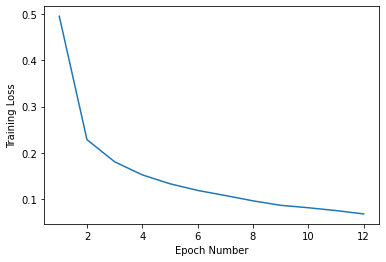

In [35]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],history.history['loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Training Loss')
plt.show()

### Overall accuracy and per-class accuracy on test dataset? 

In [36]:
#### write your code to report overall accuracy on test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Overall accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1428 - accuracy: 0.9581
Overall accuracy: 0.9581000208854675


313/313 [==============================] - 1s 3ms/step


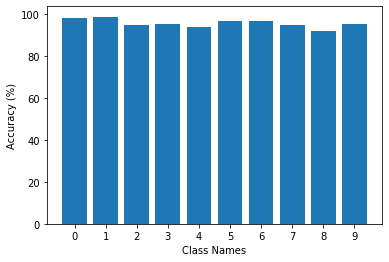

Accuracy of each class is:
Class 0 : 98.37%
Class 1 : 98.85%
Class 2 : 95.06%
Class 3 : 95.54%
Class 4 : 93.89%
Class 5 : 96.86%
Class 6 : 96.66%
Class 7 : 94.94%
Class 8 : 92.20%
Class 9 : 95.44%


In [37]:
### write your code to report per-class accuracy
### Use confusion matrix from sklearn. 

from sklearn.metrics import confusion_matrix

class_names = ['0','1','2','3','4','5','6','7','8','9']
y_true = test_labels
y_pred = model.predict(test_images)
y_classes =np.argmax(y_pred,axis=1)
matrix = confusion_matrix(y_true, y_classes)
acc = matrix.diagonal()/matrix.sum(axis=1) * 100
plt.bar(class_names, acc)
plt.xlabel('Class Names')
plt.ylabel('Accuracy (%)')
plt.show()
print('Accuracy of each class is:')
for i in range(len(acc)):
  print('Class', i, ':' , '%.2f' % acc[i] + '%')

**Code to visualize the predictions**

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
class_names = ['0','1','2','3','4','5','6','7','8','9']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    #print(train_labels[i][0])
    plt.xlabel(class_names[train_labels[i]])

ModuleNotFoundError: No module named 'matplotlib'